In [31]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_squared_error, r2_score

In [32]:
df_data_general = pd.read_csv('../../data/data_general.csv')

In [33]:
columns_selected = ['AVG_BET_std',
        'INITIAL_AMOUNT_std', 'GAMES_PLAYED_TOTAL_std',
        'GAMES_WON_TOTAL_std', 'Rango_Edad_le']
df_data_general = df_data_general[df_data_general['Cluster'] == 0]
df_data_selected = df_data_general[columns_selected]

# Linear Regression

In [34]:
pca = PCA(n_components=2)
components = pca.fit_transform(df_data_selected)
df_data_selected['PCA1'] = components[:, 0]
df_data_selected['PCA2'] = components[:, 1]

C:\Users\ismer\AppData\Local\Temp\ipykernel_28928\3727481083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_selected['PCA1'] = components[:, 0]
C:\Users\ismer\AppData\Local\Temp\ipykernel_28928\3727481083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_selected['PCA2'] = components[:, 1]


In [38]:
X = df_data_selected['PCA1'].values
y = df_data_selected['PCA2'].values

In [39]:
log_y = np.log(y)

C:\Users\ismer\AppData\Local\Temp\ipykernel_28928\3392378539.py:1: RuntimeWarning: invalid value encountered in log
  log_y = np.log(y)


In [ ]:
coeffs = np.polyfit(X, log_y, 1)
b, log_a = coeffs


In [41]:
a = np.exp(log_a)

In [42]:
y_fit = a * np.exp(b * X)

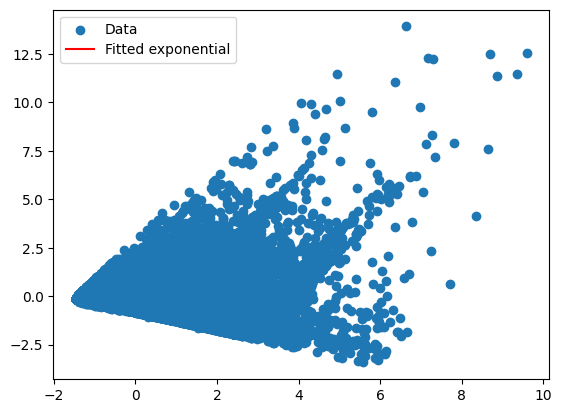

In [44]:
# Graficar
plt.scatter(X, y, label='Data')
plt.plot(X, y_fit, label='Fitted exponential', color='red')
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())
